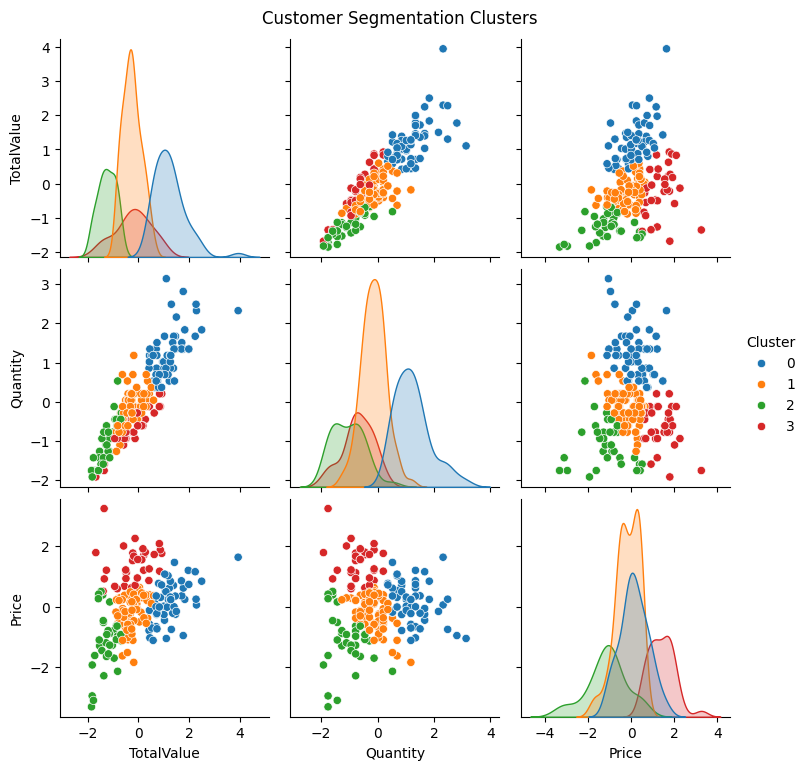

Number of clusters formed: 4
Davies-Bouldin Index: 1.3266651614263978


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

data = transactions.merge(customers, on="CustomerID", how="left")

customer_profiles = data.groupby("CustomerID").agg({
    "TotalValue": "sum",      # Total value of transactions
    "Quantity": "sum",        # Total quantity purchased
    "Price": "mean",          # Average price of products purchased
    "Region": lambda x: x.mode()[0],  # Most common region
}).reset_index()

customer_profiles = pd.get_dummies(customer_profiles, columns=["Region"], drop_first=True)

scaler = StandardScaler()
numerical_features = ["TotalValue", "Quantity", "Price"]
customer_profiles[numerical_features] = scaler.fit_transform(customer_profiles[numerical_features])

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
customer_profiles["Cluster"] = kmeans.fit_predict(customer_profiles.drop("CustomerID", axis=1))

db_index = davies_bouldin_score(
    customer_profiles.drop(["CustomerID", "Cluster"], axis=1), customer_profiles["Cluster"]
)


sns.pairplot(customer_profiles, hue="Cluster", vars=numerical_features, palette="tab10")
plt.suptitle("Customer Segmentation Clusters", y=1.02)
plt.show()
customer_profiles.to_csv("Customer_Segmentation.csv", index=False)

print(f"Number of clusters formed: {k}")
print(f"Davies-Bouldin Index: {db_index}")
